Let us consider $y = \theta^T z + \epsilon, z_i \sim N(m, \sigma^2), \epsilon \sim N(0, \sigma_\epsilon^2)$. <br>
We observe $x_i \sim N(z_i, \sigma_z^2)$. We estimate y using the maximum likelihood estimation as a linear function of x. Derive the quadratic risk for such estimate. Investigate, does layer norm among dimensions of x improves the risk theoretically or experimentally

$$ p(y|x) = \int p(y,z |x)dz = \int p(y|z,x) p(z|x) dz $$
$$ p(z|x) = \frac{p(x|z)p(z)}{p(x)} $$
$$ \argmax_y{p(y|x)} = \argmax_y{\int p(y|z,x) p(x|z)p(z) dz} $$
$$ y = \theta^T z + \epsilon \Rightarrow \epsilon = y - \theta^T z \Rightarrow p(y|z,x) = \mathcal{N}(y - \theta^Tz|0, \sigma^2_\epsilon)$$
$$ p(x|z) = \prod_i \mathcal{N}(x_i | z_i, \sigma^2_z) $$
$$ p(z) = \prod_i \mathcal{N}(z_i | m, \sigma^2)$$
From the conjugancy:
$$p(z|x) =  \prod_i  \mathcal{N}\left(z_i \bigg| x_i + m, \frac{\sigma^2_z \sigma^2}{\sigma^2 + \sigma^2_z}\right)$$
$$ \argmax_y{p(y|x)} = \argmax_y{\int \mathcal{N}(y - \theta^Tz|0, \sigma^2_\epsilon) \prod_i  \mathcal{N}\left(z_i \bigg| x_i + m, \frac{\sigma^2_z \sigma^2}{\sigma^2 + \sigma^2_z}\right) dz_i} $$
Define $\mu_i = x_i + m$ and $\sigma_0^2 = \frac{\sigma^2_z \sigma^2}{\sigma^2 + \sigma^2_z}$



$$ \mathcal{N}(y - \theta^Tz|0, \sigma^2_\epsilon) \prod_i  \mathcal{N}\left(z_i \bigg| x_i + m, \frac{\sigma^2_z \sigma^2}{\sigma^2 + \sigma^2_z}\right) \propto \exp \left( -\frac{1}{2} \left( \frac{(y-\theta^Tz)^2}{\sigma^2_\epsilon} + \sum_i \frac{(z_i - \mu_i)^2}{\sigma^2_0} \right)\right) $$
$$ \sum_i \frac{(z_i - \mu_i)^2}{\sigma^2_0} = \frac{(z - \mu)^T (z - \mu)}{\sigma^2_0} = \frac{z^Tz - 2z^T \mu + \mu^T \mu}{\sigma^2_0}$$
$$ \frac{(y-\theta^Tz)^2}{\sigma^2_\epsilon} = \frac{y^2 - 2y \theta^Tz + (\theta^Tz)^2}{\sigma_\epsilon^2}$$
$$ \frac{y^2 - 2y \theta^Tz + (\theta^Tz)^2}{\sigma_\epsilon^2} + \frac{z^Tz - 2z^T \mu + \mu^T \mu}{\sigma^2_0} = z^T \left( \frac{1}{\sigma_0^2} + \frac{\theta \theta^T}{\sigma_\epsilon^2} \right) z  -2 \left( y\frac{\theta^T}{\sigma_0^2} + \frac{\mu^T}{\sigma^2_\epsilon} \right) z + \frac{y^2}{\sigma_\epsilon^2} + \frac{\mu^T\mu}{\sigma_0^2}$$
We can introduce symmetric positive-definite matrix $D$:
$$ D = \left( \frac{1}{\sigma_0^2} + \frac{\theta \theta^T}{\sigma_\epsilon^2} \right) \rightarrow z^T \left( \frac{1}{\sigma_0^2} + \frac{\theta \theta^T}{\sigma_\epsilon^2} \right) z = z^T D z$$
Let's also denote:
$$ v^T = \left( y\frac{\theta^T}{\sigma_0^2} + \frac{\mu^T}{\sigma^2_\epsilon} \right) $$
Then
$$ \exp \left( -\frac{1}{2} \left( \frac{(y-\theta^Tz)^2}{\sigma^2_\epsilon} + \sum_i \frac{(z_i - \mu_i)^2}{\sigma^2_0} \right)\right) = \exp \left(-\frac{1}{2} \left(z^T D z - 2v^Tz + \frac{y^2}{\sigma_\epsilon^2} + \frac{\mu^T\mu}{\sigma_0^2}\right)\right)$$
Since $D$ is symmetric positive-definite $D^{1/2}$, $D^{-1/2}$ are correctly definied and $D^T = D$, $(D^{1/2})^T = D^{1/2}$.
$$ \exp \left( z^T D z - 2v^Tz\right) = \exp \left( (D^{1/2}z - D^{-1/2}v)^2 - v^TD^{-1}v\right) $$
$$\int \mathcal{N}(y - \theta^Tz|0, \sigma^2_\epsilon) \prod_i  \mathcal{N}\left(z_i \bigg| x_i + m, \frac{\sigma^2_z \sigma^2}{\sigma^2 + \sigma^2_z}\right) dz_i \propto \exp\left( -\frac{y^2}{2\sigma_\epsilon^2} + \frac{1}{2} v^TD^{-1}v \right)\int \exp \left( -\frac{1}{2}(D^{1/2}z - D^{-1/2}v)^2 \right) dz$$
Everywhere we used $\propto$ we omitted the terms that do not containt $y$ or $z$ since we do not need them.
$$ \int \exp \left( -\frac{1}{2}(D^{1/2}z - D^{-1/2}v)^2 \right) dz \overset{u = z - D^{-1}v}{=} \int \exp \left( -\frac{1}{2}(D^{1/2}u)^2 \right) du$$
As we can see, the integral doesn't actually depend on $y$. <br>
So, we are left with:
$$ \hat{y} = \argmax_y{\int \mathcal{N}(y - \theta^Tz|0, \sigma^2_\epsilon) \prod_i  \mathcal{N}\left(z_i \bigg| x_i + m, \frac{\sigma^2_z \sigma^2}{\sigma^2 + \sigma^2_z}\right) dz_i} =  \argmax_y{\left[\exp\left( -\frac{y^2}{2\sigma_\epsilon^2} + \frac{1}{2} v^TD^{-1}v \right)\right]} = $$
$$ = \argmax_y{\left( -\frac{y^2}{\sigma_\epsilon^2} + v^TD^{-1}v \right)}$$
$$ \frac{d}{dy} \left(-\frac{y^2}{\sigma_\epsilon^2} + v^TD^{-1}v\right) = \frac{-2y}{\sigma_\epsilon^2} + \frac{2v^TD^{-1}\theta}{\sigma_0^2} = 0$$
$$ \hat{y} =  \frac{\sigma^2_\epsilon}{\sigma_0^2} v^TD^{-1}\theta $$
Notice:
$$ D \theta = \left( \frac{1}{\sigma_0^2} + \frac{\theta \theta^T}{\sigma_\epsilon^2} \right) \theta = \left( \frac{1}{\sigma_0^2} + \frac{\theta^T \theta}{\sigma_\epsilon^2} \right) \theta \Rightarrow D^{-1}\theta = \left( \frac{1}{\sigma_0^2} + \frac{\theta^T \theta}{\sigma_\epsilon^2} \right)^{-1} \theta $$
$$\hat{y} = \frac{\sigma^2_\epsilon}{\sigma_0^2} \left( \frac{1}{\sigma_0^2} + \frac{\theta^T \theta}{\sigma_\epsilon^2} \right)^{-1} v^T \theta $$
$$ \hat{y} = \frac{\sigma^2_\epsilon}{\sigma_0^2} \left( \frac{1}{\sigma_0^2} + \frac{\theta^T \theta}{\sigma_\epsilon^2} \right)^{-1} \left( \hat{y}\frac{\theta^T\theta}{\sigma_0^2} + \frac{\mu^T\theta}{\sigma^2_\epsilon} \right)$$
$$ \left( \frac{1}{\sigma_0^2} + \frac{\theta^T \theta}{\sigma_\epsilon^2} \right) \hat{y} = \frac{\sigma^2_\epsilon}{\sigma_0^2} \left( \hat{y} \frac{\theta^T\theta}{\sigma_0^2} + \frac{\mu^T\theta}{\sigma^2_\epsilon} \right)$$
$$ \left( \frac{1}{\sigma_0^2} + \frac{\theta^T \theta}{\sigma_\epsilon^2} + \frac{\sigma^2_\epsilon}{\sigma_0^2} \frac{\theta^T\theta}{\sigma_0^2} \right)\hat{y} = \frac{\mu^T\theta}{\sigma^2_0} $$
$$ \left( 1 + \theta^T \theta \left(\frac{\sigma_0^2}{\sigma_\epsilon^2} + \frac{\sigma^2_\epsilon}{\sigma_0^2} \right) \right)\hat{y} = \mu^T\theta $$
$$\boxed{\hat{y}_\text{MLE} = \frac{\mu^T\theta}{1 + \theta^T \theta \left(\frac{\sigma_0^2}{\sigma_\epsilon^2} + \frac{\sigma^2_\epsilon}{\sigma_0^2} \right)}, \quad \mu = x + m, \;\sigma_0^2 = \frac{\sigma^2_z \sigma^2}{\sigma^2 + \sigma^2_z}} $$

Quadratic risk $E[(y - \hat{y})^2]$:
$$E[(y - \hat{y})^2] = E[(\theta^Tz + \epsilon - \hat{y}^2)] = E[(\theta^T - z)^2] + 2E[(\theta^Tz - \hat{y})\epsilon] + E[\epsilon^2]$$
$$ E[\epsilon^2] = \sigma_\epsilon^2$$
$$ E[(\theta^Tz - \hat{y})\epsilon] = E[(\theta^Tz - \hat{y})]E[\epsilon] = 0$$
$$ E[(y - \hat{y})^2] = E[(\theta^T z - \hat{y})^2] + \sigma_\epsilon^2$$
$$E[(\theta^T z - \hat{y})^2] = E[(\theta^T z)^2 - 2\theta^T z \hat{y} + \hat{y}^2)]$$
$$ E[(\theta^T z)^2] = \sigma^2 \sum_i \theta_i^2 + m^2 \sum_{i,j} \theta_i \theta_j $$
In our case
$$ \hat{y} = \alpha^T (x + m)$$
$$ p(z, x) = p(x|z)p(z) = \prod_i \mathcal{N}(x_i | z_i, \sigma^2_z) \mathcal{N}(z_i | m, \sigma^2)$$
$$ E[\theta^T z \hat{y}] = E[(\theta^T z)(\alpha^T (x + m))] = \int \int (\theta^T z)(\alpha^T (x + m)) \prod_i \mathcal{N}(x_i | z_i, \sigma^2_z) \mathcal{N}(z_i | m, \sigma^2) dx_i dz_i =$$
$$= \int (\theta^T z)(\alpha^T (z + m)) \prod_i \mathcal{N}(z_i | m, \sigma^2) dz_i = \sum_i \theta_i \alpha_i E[z_i^2] +  \sum\limits_{\substack{i,j \\ i\neq j}} \theta_i \alpha_j E[z_i z_j] + m^2 \sum_{i,j} \alpha_i \theta_j= \sum_i \theta_i \alpha_i (m^2 + \sigma^2) + \sum\limits_{\substack{i,j \\ i\neq j}} \theta_i \alpha_j m^2 + m^2 \sum_{i,j} \alpha_i \theta_j = 2m^2 \sum_{i, j}\alpha_i \theta_j + \sigma^2 \sum_{i} \alpha_i \theta_i$$
$$E[\hat{y}^2] = E[(\alpha^T (x + m))^2] = \sigma_z^2 \sum_i \alpha_i^2 + \sum_{i,j} m^2 \alpha_i \alpha_j + 3 m^2 \sum_{i,j} \alpha_i \alpha_j = \sigma_z^2 \sum_i \alpha_i^2 + 4 m^2 \sum_{i,j} \alpha_i \alpha_j$$
Finally, 
$$E[(y - \hat{y})^2] = \sigma^2 \sum_i \theta_i^2 + m^2 \sum_{i,j} \theta_i \theta_j  - 2\left(2 m^2 \sum_{i, j}\alpha_i \theta_j + \sigma^2 \sum_{i} \alpha_i \theta_i\right) + \sigma_z^2 \sum_i \alpha_i^2 + 4m^2\sum_{i,j} \alpha_i \alpha_j + \sigma^2_\epsilon$$

For MLE estimate we just have to plug in $\alpha_i = \frac{\theta_i}{1 + \theta^T \theta \left(\frac{\sigma_0^2}{\sigma_\epsilon^2} - \frac{\sigma^2_\epsilon}{\sigma_0^2} \right)}$

### Experiments

Here we consider the data generated in the described above manner. We split it into train/test and then train 2 models (1 linear layer) in supervised manner - one with the layer norm applied to the input and 1 without. We then compare their performance on both train and test set. We use MSELoss as a loss function and as a target metric (because it is an estimate for the quadratic risk). We average loss across all observations. <br>
We use layer norm without any trainable parameters (elementwise_affine=False) since it should not affect our linear prediction.  
In every experiment we set $\sigma_z = 0.8$.

In [252]:
import numpy as np
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset
import torch.nn as nn
from torch.utils.data import DataLoader
from tqdm import tqdm
from torch.optim import SGD
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [285]:
DIM = 10
SIZE = 100_000

In [199]:
def generate_data(m, sigma, sigma_z, n=DIM, size=SIZE):
    """
    Generate data according to the problem description. (see above)
 
    Parameters
    ----------
    m : int
        Mean for z sampling.
    sigma : float
        Standard deviation for z sampling.
    sigma_z : float
        Standard deviation for x sampling
    n : int
        The dimension
    size : int
        Size of the dataset.

    Returns
    -------
    X : np.ndarray
    Y : np.ndarray
    meta : dict
        Metainformation containing (theta, z)
    """

    X, Y = [], []
    meta = {}
    theta = np.random.uniform(-10, 10, n)
    meta['theta'] = theta
    meta['z'] = []
    
    for _ in range(size):
        z = np.random.normal(loc=m, scale=sigma ** 2, size=n)
        noise = np.random.normal()
        y = theta.T @ z + noise

        x = np.random.normal(loc=z, scale=sigma_z ** 2)

        X += [x]
        Y += [y]
        meta['z'] += [z]

    return np.array(X), np.array(Y), meta


In [119]:
class Data(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return torch.tensor(self.X[idx], dtype=torch.float), torch.tensor(self.y[idx], dtype=torch.float)

In [254]:
def train(model, train_dataloader, val_dataloader, loss_fn, optimizer, n_epochs=300):
    train_loss = []
    val_loss = []
    for _ in tqdm(range(n_epochs), colour='CYAN'):
        model.train()
        total_loss = 0.
        total_cnt = 0
        for data in train_dataloader:
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_fn(outputs, labels)
            loss.backward()

            optimizer.step()

            total_cnt += labels.shape[0]
            total_loss += loss.item() * labels.shape[0]

        train_loss.append(total_loss / total_cnt)

        model.eval()
        total_loss = 0.
        total_cnt = 0
        with torch.no_grad():
            for vdata in val_dataloader:
                vinputs, vlabels = vdata
                voutputs = model(vinputs)
                vloss = loss_fn(voutputs, vlabels)
                total_cnt += labels.shape[0]
                total_loss += vloss.item() * labels.shape[0]
        
        val_loss.append(total_loss / total_cnt)

        if _ % 10 == 0:
            tqdm.write('LOSS: train {}, validation {}'.format(train_loss[-1], val_loss[-1]))
        
        if _ > 5 and (max(val_loss[-5:]) - min(val_loss[-5:])) < 0.01: # if loss doesn't change over the last 5 epochs we stop
            train_loss += [train_loss[-1]] * (n_epochs - len(train_loss))
            val_loss += [val_loss[-1]] * (n_epochs - len(val_loss))
            return train_loss, val_loss

    return train_loss, val_loss

In [265]:
def compare(m, sigma, sigma_z, test_size=0.2, batch_size=1024, lr=3e-3, n_epochs=300):
    """
        Generate data and then compare models with and without Layer Norm.
    
        Parameters
        ----------
        m : int
            Mean for z sampling.
        sigma : float
            Standard deviation for z sampling.
        sigma_z : float
            Standard deviation for x sampling
        test_size : float
            What part use for testing.

        Returns
        -------
        tr : list:
            Average loss on every epoch for the train data for the model without layer norm.
        tst : list:
            Average loss on every epoch for the test data for the model without layer norm.
        tr_n : list:
            Average loss on every epoch for the train data for the model with layer norm.
        tst_n : list:
            Average loss on every epoch for the test data for the model with layer norm.
        
    """
    X, y, meta = generate_data(m, sigma, sigma_z)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size
    )

    train_dataset = Data(X_train, y_train)
    test_dataset = Data(X_test, y_test)

    train_dataloader = DataLoader(train_dataset, batch_size=batch_size)
    test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

    model_base = nn.Sequential(
    nn.Linear(DIM, 1)
    )

    model_norm = nn.Sequential(
        nn.LayerNorm(DIM, elementwise_affine=False),
        nn.Linear(DIM, 1)
    )

    optimizer = SGD(model_base.parameters(), lr=lr)
    tr, tst = train(model_base, train_dataloader, test_dataloader, nn.MSELoss(), optimizer, n_epochs=n_epochs)

    print('Switching models')

    optimizer_n = SGD(model_norm.parameters(), lr=lr)
    tr_n, tst_n = train(model_norm, train_dataloader, test_dataloader, nn.MSELoss(), optimizer_n, n_epochs=n_epochs)

    return tr, tst, tr_n, tst_n

In [260]:
def plot_results(tr, tst, tr_n, tst_n, skip_first=0):
    """
        Plot the results of experiments.

        Parameters
        ----------
        skip_first : int
        How many first observations to skip. (Inititally loss is very big and it makes it hard to notice any difference between experiments)
    """
    plt.plot(tr_n[skip_first:], label='train_w_layer_norm')
    plt.plot(tst_n[skip_first:], label='test_w_layer_norm')
    plt.plot(tr[skip_first:], label='train_wo_norm')
    plt.plot(tst[skip_first:], label='test_wo_norm')
    plt.legend()
    print('Final loss on train:')
    print(f'With layer_norm {tr_n[-1]}, without {tr[-1]}')
    print('-' * 50)
    print('Final loss on test:')
    print(f'With layer_norm {tst_n[-1]}, without {tst[-1]}')

Qualitatively there are 3 main regimes for $\sigma$ and $m$:<br>
1) $m \sim \sigma$
2) $m \gg \sigma$
3) $m \ll \sigma$ <br>

Bellow we will provide multiple experiments for each regime and analyze them. 

### $m \sim \sigma$

  0%|          | 1/300 [00:00<03:34,  1.39it/s]

LOSS: train 21.385495846557617, validation 20.560294151306152


  4%|▎         | 11/300 [00:07<03:14,  1.49it/s]

LOSS: train 20.51450057373047, validation 20.40066452026367


  0%|          | 1/300 [00:00<03:37,  1.38it/s]

LOSS: train 21.757685803222657, validation 21.045360946655272


  3%|▎         | 8/300 [00:06<03:41,  1.32it/s]

Final loss on train:
With layer_norm 20.485507623291017, without 20.50311923828125
--------------------------------------------------
Final loss on test:
With layer_norm 20.376265907287596, without 20.39121046066284


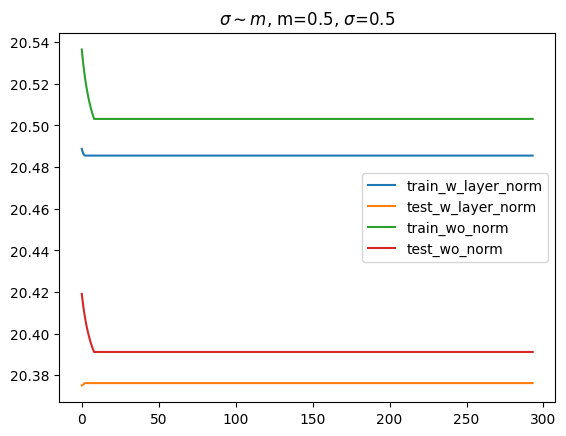

In [261]:
m = 0.5
sigma = 0.5
tr, tst, tr_n, tst_n = compare(m, sigma, 0.8)

plt.title(f'$\sigma \sim m$, m={m}, $\sigma$={sigma}')
plot_results(tr, tst, tr_n, tst_n, skip_first=6)

  1%|          | 1/100 [00:00<01:18,  1.25it/s]

LOSS: train 2422.436710546875, validation 2388.9999389648438


 11%|█         | 11/100 [00:07<01:01,  1.44it/s]

LOSS: train 2398.974801171875, validation 2372.1329345703125


 21%|██        | 21/100 [00:14<00:55,  1.42it/s]

LOSS: train 2393.095640625, validation 2366.749658203125


 31%|███       | 31/100 [00:21<00:48,  1.42it/s]

LOSS: train 2391.176432421875, validation 2365.0564453125


 41%|████      | 41/100 [00:28<00:41,  1.42it/s]

LOSS: train 2390.54853515625, validation 2364.5388793945312


 51%|█████     | 51/100 [00:36<00:37,  1.31it/s]

LOSS: train 2390.342294921875, validation 2364.3895629882813


 60%|██████    | 60/100 [00:43<00:29,  1.38it/s]


LOSS: train 2390.274109375, validation 2364.3518798828127


  1%|          | 1/100 [00:00<01:19,  1.25it/s]

LOSS: train 2546.203927734375, validation 2450.178259277344


 11%|█         | 11/100 [00:08<01:07,  1.32it/s]

LOSS: train 2389.94869296875, validation 2364.355432128906


 18%|█▊        | 18/100 [00:14<01:06,  1.24it/s]

Final loss on train:
With layer_norm 2389.93080234375, without 2390.274109375
--------------------------------------------------
Final loss on test:
With layer_norm 2364.401904296875, without 2364.3518798828127


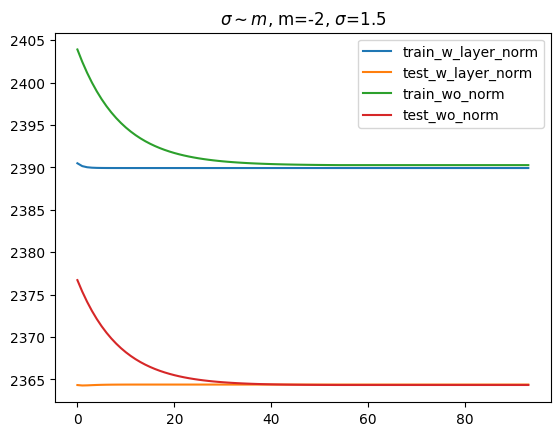

In [263]:
m = -2
sigma = 1.5

tr, tst, tr_n, tst_n = compare(m, sigma, 0.8, n_epochs=100)

plt.title(f'$\sigma \sim m$, m={m}, $\sigma$={sigma}')
plot_results(tr, tst, tr_n, tst_n, skip_first=6)

### $m \gg \sigma$

  0%|          | 1/400 [00:00<05:23,  1.23it/s]

LOSS: train 4.186940594482422, validation 2.1142835915088654


  3%|▎         | 11/400 [00:09<05:45,  1.13it/s]

LOSS: train 1.95202322807312, validation 1.9566747903823853


  4%|▎         | 14/400 [00:12<05:57,  1.08it/s]


Switching models


  0%|          | 1/400 [00:00<06:03,  1.10it/s]

LOSS: train 69.66163992919923, validation 41.77386474609375


  3%|▎         | 11/400 [00:10<06:00,  1.08it/s]

LOSS: train 1.5345673501968384, validation 1.5384590029716492


  3%|▎         | 13/400 [00:13<06:30,  1.01s/it]

Final loss on train:
With layer_norm 1.5299067184448243, without 1.9420433864593505
--------------------------------------------------
Final loss on test:
With layer_norm 1.5365007102489472, without 1.9476362466812134


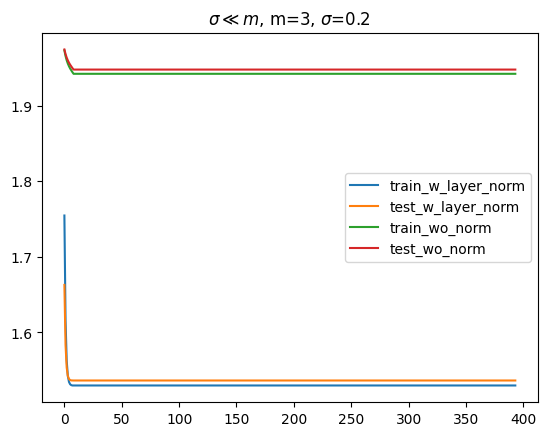

In [270]:
m = 3
sigma = 0.2

tr, tst, tr_n, tst_n = compare(m, sigma, 0.8, n_epochs=400)

plt.title(f'$\sigma \ll m$, m={m}, $\sigma$={sigma}')
plot_results(tr, tst, tr_n, tst_n, skip_first=6)

  0%|          | 1/400 [00:00<05:39,  1.18it/s]

LOSS: train 4.506439881896973, validation 4.2530245900154116


  2%|▏         | 8/400 [00:07<06:12,  1.05it/s]


Switching models


  0%|          | 1/400 [00:00<05:57,  1.11it/s]

LOSS: train 8.888504583740234, validation 6.949326014518737


  2%|▎         | 10/400 [00:09<05:53,  1.10it/s]

LOSS: train 4.181150569152832, validation 4.144595384597778
Final loss on train:
With layer_norm 4.181150569152832, without 4.237857356262207
--------------------------------------------------
Final loss on test:
With layer_norm 4.144595384597778, without 4.202827048301697


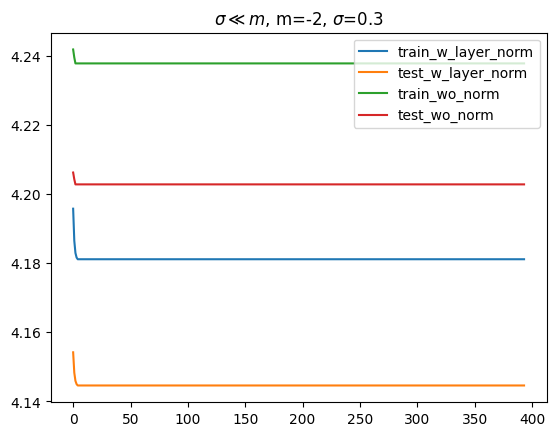

In [271]:
m = -2
sigma = 0.3

tr, tst, tr_n, tst_n = compare(m, sigma, 0.8, n_epochs=400)

plt.title(f'$\sigma \ll m$, m={m}, $\sigma$={sigma}')
plot_results(tr, tst, tr_n, tst_n, skip_first=6)

### $m \ll \sigma$

  1%|          | 1/100 [00:01<01:45,  1.07s/it]

LOSS: train 395.66619379882815, validation 392.98307647705076


 11%|█         | 11/100 [00:10<01:22,  1.08it/s]

LOSS: train 390.5499555175781, validation 388.0342498779297


 21%|██        | 21/100 [00:18<01:05,  1.20it/s]

LOSS: train 389.7148353515625, validation 387.13612670898436


 31%|███       | 31/100 [00:26<00:47,  1.47it/s]

LOSS: train 389.5337004882812, validation 386.91201171875


 41%|████      | 41/100 [00:33<00:38,  1.54it/s]

LOSS: train 389.48842685546873, validation 386.84414825439455


 47%|████▋     | 47/100 [00:38<00:43,  1.21it/s]


Switching models


  1%|          | 1/100 [00:00<01:19,  1.25it/s]

LOSS: train 393.618521875, validation 391.09578094482424


 11%|█         | 11/100 [00:08<01:03,  1.40it/s]

LOSS: train 390.33174599609373, validation 387.81053619384767


 21%|██        | 21/100 [00:15<00:52,  1.51it/s]

LOSS: train 389.65302431640623, validation 387.068359375


 31%|███       | 31/100 [00:22<00:51,  1.34it/s]

LOSS: train 389.5110383789063, validation 386.8844940185547


 41%|████      | 41/100 [00:29<00:38,  1.53it/s]

LOSS: train 389.4805616210937, validation 386.832341003418


 44%|████▍     | 44/100 [00:31<00:40,  1.39it/s]

Final loss on train:
With layer_norm 389.47661166992185, without 389.47847954101564
--------------------------------------------------
Final loss on test:
With layer_norm 386.82327728271486, without 386.8253829956055


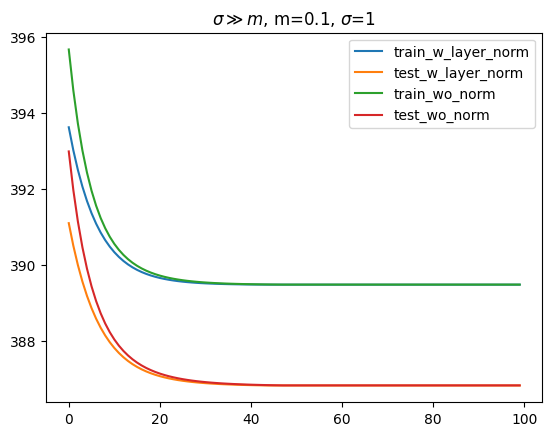

In [273]:
m = 0.1
sigma = 1

tr, tst, tr_n, tst_n = compare(m, sigma, 0.8, n_epochs=100, lr=5e-4)

plt.title(f'$\sigma \gg m$, m={m}, $\sigma$={sigma}')
plot_results(tr, tst, tr_n, tst_n, skip_first=0)

  0%|          | 1/300 [00:00<04:47,  1.04it/s]

LOSS: train 6238.34970546875, validation 6184.059716796875


  4%|▎         | 11/300 [00:09<04:08,  1.16it/s]

LOSS: train 6219.47204375, validation 6164.562719726562


  7%|▋         | 21/300 [00:17<03:50,  1.21it/s]

LOSS: train 6215.99153046875, validation 6159.682373046875


 10%|█         | 31/300 [00:26<03:43,  1.20it/s]

LOSS: train 6215.29648671875, validation 6158.2684326171875


 14%|█▎        | 41/300 [00:34<03:40,  1.17it/s]

LOSS: train 6215.17098359375, validation 6157.7947998046875


 17%|█▋        | 51/300 [00:43<03:31,  1.18it/s]

LOSS: train 6215.1549546875, validation 6157.61455078125


 20%|██        | 61/300 [00:51<03:23,  1.18it/s]

LOSS: train 6215.1565109375, validation 6157.539331054688


 24%|██▎       | 71/300 [00:59<03:12,  1.19it/s]

LOSS: train 6215.159146875, validation 6157.50625


 24%|██▎       | 71/300 [01:00<03:15,  1.17it/s]


Switching models


  0%|          | 1/300 [00:00<04:43,  1.05it/s]

LOSS: train 6238.6937578125, validation 6186.27900390625


  4%|▎         | 11/300 [00:09<03:58,  1.21it/s]

LOSS: train 6219.7645796875, validation 6164.94580078125


  7%|▋         | 21/300 [00:18<04:07,  1.13it/s]

LOSS: train 6216.00600625, validation 6159.719995117188


 10%|█         | 31/300 [00:26<03:46,  1.19it/s]

LOSS: train 6215.289328125, validation 6158.260815429688


 14%|█▎        | 41/300 [00:35<03:45,  1.15it/s]

LOSS: train 6215.16686953125, validation 6157.785961914063


 17%|█▋        | 51/300 [00:44<03:34,  1.16it/s]

LOSS: train 6215.1527671875, validation 6157.609057617187


 20%|██        | 61/300 [00:51<03:02,  1.31it/s]

LOSS: train 6215.15493359375, validation 6157.536596679687


 23%|██▎       | 70/300 [00:58<03:13,  1.19it/s]

LOSS: train 6215.15773984375, validation 6157.505322265625
Final loss on train:
With layer_norm 6215.15773984375, without 6215.159365625
--------------------------------------------------
Final loss on test:
With layer_norm 6157.505322265625, without 6157.504443359375


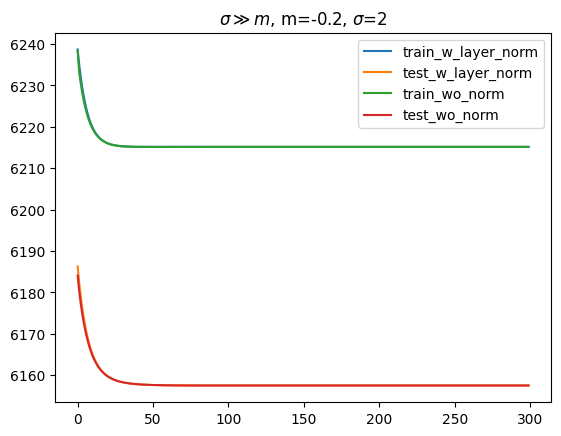

In [274]:
m = -0.2
sigma = 2

tr, tst, tr_n, tst_n = compare(m, sigma, 0.8, lr=5e-4)

plt.title(f'$\sigma \gg m$, m={m}, $\sigma$={sigma}')
plot_results(tr, tst, tr_n, tst_n, skip_first=0)

Analyzing the results, we can say that in our case layer norm always speeds the convergence significantly. Perfomance of the model with layer norm is also always better than the one without norm. Difference is the most significant in the regime $\sigma \gg m$, in the regime $\sigma \sim m$ model with layer norm is also noticeable better and converges faster. In the regime $\sigma \gg m$ there is barely any difference between the models in terms of perfomance, however model with layer norm converges a little bit faster.

### Theoretical approach

We observe $(x_1, \ldots, x_n)$. Layer norm does the following:
$$ \tilde{x}_i \rightarrow \frac{x_i - \mu}{\sigma}, \quad \mu = \frac{1}{n} \sum_{i=1}^n x_i, \quad \sigma^2 = \frac{1}{n} \sum_{i=1}^n (x_i - \mu)^2$$
From the first glance, layer norm should not increase the results, because it is a linear function. Since we are predicting using the linear function, if we add layer norm we would also get a linear function. However, the coefficents of the layer norm are different for different inputs $(x_1, \ldots, x_n)$ but for our model linear layer we're trying to find fixed weights that work best for our data. We can consider very simple case, when $z_i = z_0, \forall i \in \overline {1, n}$. Then $x_i$ are i.i.d. $\rightarrow x_i \sim \mathcal{N}(z_0, \sigma_z^2)$.
For sample $(x_1, \ldots, x_n)$:
$$ \mu \rightarrow z_0$$  
$$ \sigma^2 \rightarrow \sigma^2_z $$
Now $\tilde{x}_i$ are distributed as $\mathcal{N}(0, 1)$. <br>
Let's take a look at the gradients:
$$ \frac{\partial}{\partial \alpha_i}\| y - \alpha^T \tilde{x} \|^2_2 = -2(y - \alpha^T \tilde{x}) \tilde{x}_i$$
$$ \frac{\partial}{\partial \alpha_i}\| y - \alpha^T x \|^2_2 = -2(y - \alpha^T x) x_i$$

https://arxiv.org/pdf/1802.06455.pdf